ANSWERS
Q1:ValentineFernandes,kovidgoyal,slidenerd,aryashah2k,coding-parrot
Q2:ivank,sandeepshetty,svs,nitinhayaran,nischal
Q3:mit,apache-2.0,other
Q4:MASAI SCHOOL
Q5:JavaScript
Q6:HTML
Q7:TSQL
Q8:kovidgoyal,coding-parrot,gkcs,slidenerd,dmalvia
Q9:0.035
Q10:0.101
Q11:0.161 
Q12:9.139 
Q13:-0.004
Q14:Kushal334,alokproc,vinod1988,patilswapnilv,rajeshpillai
Q15:0.218 
Q16:Singh

### Github API scrape code

In [ ]:
import requests
import time

# Replace with your GitHub personal access token
GITHUB_TOKEN = "TEST"

# GitHub API URL
BASE_URL = "https://api.github.com"

# Headers for authentication
headers = {
    "Authorization": f"token {GITHUB_TOKEN}"
}

def get_users_in_mumbai(min_followers=50):
    query = f"location:mumbai followers:>{min_followers}"
    params = {
        "q": query,
        "per_page": 100,  # Maximum allowed per request
        "page": 1
    }
    users = []
    
    while True:
        response = requests.get(f"{BASE_URL}/search/users", headers=headers, params=params)
        
        if response.status_code == 200:
            data = response.json()
            users.extend(data.get("items", []))
            
            # Check if there are more pages
            if "next" in response.links:
                params["page"] += 1
            else:
                break
        else:
            print(f"Failed to fetch data: {response.status_code}, {response.json()}")
            break

        # Respect the API rate limits
        time.sleep(1)
    
    return users

def clean_company_name(company):
    if company:
        company = company.strip()  # Trim whitespace
        if company.startswith('@'):
            company = company[1:]  # Remove leading '@'
        return company.upper()  # Convert to uppercase
    return None

def get_user_details(username):
    user_url = f"{BASE_URL}/users/{username}"
    response = requests.get(user_url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return {
            "login": data['login'],
            "name": data.get('name'),
            "company": clean_company_name(data.get('company')),
            "location": data.get('location'),
            "email": data.get('email'),
            "hireable": data.get('hireable'),
            "bio": data.get('bio'),
            "public_repos": data.get('public_repos'),
            "followers": data.get('followers'),
            "following": data.get('following'),
            "created_at": data.get('created_at')
        }
    else:
        print(f"Failed to fetch user details for {username}: {response.status_code}")
        return None

def get_user_repositories(username):
    repos_url = f"{BASE_URL}/users/{username}/repos"
    params = {
        "sort": "pushed",
        "per_page": 100,  # Maximum allowed per request
        "page": 1
    }
    repositories = []

    while len(repositories) < 500:
        response = requests.get(repos_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            for repo in data:
                repositories.append({
                    "login": repo['owner']['login'],
                    "full_name": repo['full_name'],
                    "created_at": repo['created_at'],
                    "stargazers_count": repo['stargazers_count'],
                    "watchers_count": repo['watchers_count'],
                    "language": repo.get('language'),
                    "has_projects": repo.get('has_projects'),
                    "has_wiki": repo.get('has_wiki'),
                    "license_name": repo['license']['key'] if repo.get('license') else None
                })

            if len(data) < 100 or len(repositories) >= 500:
                break
            else:
                params["page"] += 1
        else:
            print(f"Failed to fetch repositories for {username}: {response.status_code}")
            break

        # Respect the API rate limits
        time.sleep(1)

    return repositories

if __name__ == "__main__":
    # Get users in Mumbai with more than 50 followers
    users = get_users_in_mumbai(min_followers=50)
    user_details_list = []
    repositories_list = []

    for user in users:
        details = get_user_details(user['login'])
        if details:
            user_details_list.append(details)
            repos = get_user_repositories(user['login'])
            repositories_list.extend(repos)

    # Print or save the user details and repositories as needed
    print("User Details:")
    for user in user_details_list:
        print(user)
    
    print("\nRepositories:")
    for repo in repositories_list:
        print(repo)

### Imports

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

### Import data from csv answer questions

In [2]:
user_df = pd.read_csv('users.csv')
repo_df = pd.read_csv('repositories.csv')

In [51]:
user_df = user_df.fillna('')
repo_df = repo_df.fillna('')

In [53]:
repo_df['has_projects'] = repo_df['has_projects'].astype(str).str.lower()
repo_df['has_wiki'] = repo_df['has_wiki'].astype(str).str.lower()

user_df['hireable'] = user_df['hireable'].astype(str).str.lower()

In [55]:
user_df.to_csv('uss.csv', index=False)
repo_df.to_csv('repo.csv', index=False)

In [56]:
# Q1
top5 = user_df.sort_values(by='followers', ascending=False).head(5)
', '.join(top5['login'])

'ValentineFernandes, kovidgoyal, slidenerd, aryashah2k, coding-parrot'

In [ ]:
# Q2
user_df['created_at'] = pd.to_datetime(user_df['created_at'])
earliest_users = user_df.sort_values(by='created_at', ascending=True).head(5)

earliest_logins = ','.join(earliest_users['login'])
print(earliest_logins)


ivank,sandeepshetty,svs,nitinhayaran,nischal


In [ ]:
# Q3
fill_df = repo_df.dropna(subset=['license_name'])
# Count occurrences of each license and get the top 3
top_3_licenses = fill_df['license_name'].value_counts().head(4).index
# Convert the top 3 licenses to a comma-separated string
top_3_licenses_str = ','.join(top_3_licenses)
print(top_3_licenses_str)

,mit,apache-2.0,other


In [105]:
# Q4
user_df['company'].value_counts().head(2)

company
                311
MASAI SCHOOL     14
Name: count, dtype: int64

In [ ]:
# Q5
filtered_repos = repo_df.dropna(subset=['language'])
# Count occurrences of each language
language_counts = filtered_repos['language'].value_counts().head(2)
# Get the most popular programming language
print(language_counts)

language
              11546
JavaScript     8119
Name: count, dtype: int64


In [ ]:
# Q6
# Convert 'created_at' to datetime
user_df['created_at'] = pd.to_datetime(user_df['created_at'])
# Filter users who joined after 2020
users_after_2020 = user_df[user_df['created_at'] > '2020-12-31']
# Get the list of logins for users who joined after 2020
logins_after_2020 = users_after_2020['login'].tolist()
# Filter repositories to include only those of users who joined after 2020
filtered_repos = repo_df[repo_df['login'].isin(logins_after_2020)]
# Drop rows where 'language' is missing (None or NaN)
filtered_repos = filtered_repos.dropna(subset=['language'])
# Count occurrences of each language
language_counts = filtered_repos['language'].value_counts()
print(language_counts.head(5))

language
JavaScript    2125
              1918
HTML           801
Python         498
TypeScript     331
Name: count, dtype: int64


In [75]:
# Q7
# Drop rows where 'language' is missing (None or NaN)
filtered_repos = repo_df.dropna(subset=['language'])
# Calculate the average number of stars per repository for each language
average_stars_per_language = filtered_repos.groupby('language')['stargazers_count'].mean()
# Find the language with the highest average stars
language_with_highest_avg_stars = average_stars_per_language.idxmax()
highest_avg_stars = average_stars_per_language.max()
print(f"The language with the highest average number of stars is: {language_with_highest_avg_stars} with an average of {highest_avg_stars} stars.")

The language with the highest average number of stars is: TSQL with an average of 569.0 stars.


In [ ]:
# Q8
# Calculate leader_strength
user_df['leader_strength'] = user_df['followers'] / (1 + user_df['following'])

# Sort the DataFrame by 'leader_strength' in descending order
top_5_leader_strength = user_df.sort_values(by='leader_strength', ascending=False).head(5)

# Extract the 'login' column and convert to a comma-separated string
top_5_logins = ','.join(top_5_leader_strength['login'])

print(top_5_logins)

kovidgoyal,coding-parrot,gkcs,slidenerd,dmalvia


In [ ]:
# Q9
correlation = round(user_df['followers'].corr(user_df['public_repos']),3)

print(f"The correlation between the number of followers and the number of public repositories is: {correlation}")


The correlation between the number of followers and the number of public repositories is: 0.035


In [78]:
# Q10
X = user_df[['public_repos']]  # Independent variable: number of public repositories
y = user_df['followers']  # Dependent variable: number of followers

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the coefficient for 'public_repos'
coefficient = model.coef_[0]

print(f"On average, a user gains approximately {round(coefficient, 3)} followers for each additional public repository.")

On average, a user gains approximately 0.101 followers for each additional public repository.


In [ ]:
# Q11
# Convert 'true' and 'false' strings to boolean values in 'has_projects' and 'has_wiki' columns
repo_df['has_projects'] = repo_df['has_projects'].str.lower() == 'true'
repo_df['has_wiki'] = repo_df['has_wiki'].str.lower() == 'true'

# Calculate the correlation between 'has_projects' and 'has_wiki'
correlation = repo_df['has_projects'].corr(repo_df['has_wiki'])

# Round the correlation to 3 decimal places
correlation_rounded = round(correlation, 3)

print(f"The correlation between a repository having projects enabled and having a wiki enabled is: {correlation_rounded}")

The correlation between a repository having projects enabled and having a wiki enabled is: 0.161


In [83]:
# Q12
# Convert 'true' and 'false' strings to boolean values in 'hireable' column
# user_df['hireable'] = user_df['hireable'].str.lower() == 'true'

# Calculate the average number of people followed by hireable users
average_following_hireable = user_df[user_df['hireable'] == True]['following'].mean()

# Calculate the average number of people followed by non-hireable users
average_following_non_hireable = user_df[user_df['hireable'] == False]['following'].mean()

# Compare the averages
if average_following_hireable > average_following_non_hireable:
    print("Hireable users follow more people on average than non-hireable users.")
else:
    print("Non-hireable users follow more people on average than hireable users.")

print(f"ANS: {average_following_hireable - average_following_non_hireable}")

Hireable users follow more people on average than non-hireable users.
ANS: 9.139413539600241


In [85]:
# Q13
# Filter out users with empty bio strings
user_df_filtered = user_df[user_df['bio'] != '']

# Calculate the word count for each bio
user_df_filtered['bio_word_count'] = user_df_filtered['bio'].apply(lambda x: len(x.split()))

# Calculate the correlation between bio word count and followers
correlation = user_df_filtered['bio_word_count'].corr(user_df_filtered['followers'])
correlation_rounded = round(correlation, 3)

# Reshape the data for regression
X = user_df_filtered[['bio_word_count']]  # Independent variable: bio word count
y = user_df_filtered['followers']  # Dependent variable: number of followers

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression slope for 'bio_word_count'
slope = round(model.coef_[0], 3)

print(f"The correlation between bio word count and followers is: {correlation_rounded}")
print(f"The regression slope of followers on bio word count is: {slope}")

The correlation between bio word count and followers is: -0.004
The regression slope of followers on bio word count is: -0.208


C:\Users\umang\AppData\Local\Temp\ipykernel_24496\3515501979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df_filtered['bio_word_count'] = user_df_filtered['bio'].apply(lambda x: len(x.split()))


In [87]:
# Q14
# Convert 'created_at' column to datetime if not already done
repo_df['created_at'] = pd.to_datetime(repo_df['created_at'])

# Extract the day of the week from 'created_at' (0 = Monday, 6 = Sunday)
repo_df['day_of_week'] = repo_df['created_at'].dt.dayofweek

# Filter for repositories created on weekends (Saturday = 5, Sunday = 6)
weekend_repos = repo_df[repo_df['day_of_week'].isin([5, 6])]

# Count the number of repositories created by each user on weekends
weekend_repo_counts = weekend_repos['login'].value_counts()

# Get the top 5 users with the most weekend repositories
top_5_weekend_users = weekend_repo_counts.head(5).index

# Convert the top 5 logins to a comma-separated string
top_5_weekend_logins = ','.join(top_5_weekend_users)

print(f"The top 5 users who created the most repositories on weekends are: {top_5_weekend_logins}")

The top 5 users who created the most repositories on weekends are: Kushal334,alokproc,vinod1988,patilswapnilv,rajeshpillai


In [94]:
# Q15
# Convert 'hireable' from string values to boolean
# user_df['hireable'] = user_df['hireable'].str.lower() == 'true'

# Calculate the fraction of hireable users with an email
fraction_with_email_hireable = (user_df[user_df['hireable'] == True]['email'] != '').mean()

# Calculate the fraction of non-hireable users with an email (non-empty strings)
fraction_with_email_non_hireable = (user_df[user_df['hireable'] == False]['email'] != '').mean()

# Calculate the difference and round to 3 decimal places
difference = round(fraction_with_email_hireable - fraction_with_email_non_hireable, 3)

print(f"The difference in the fraction of users with an email between hireable and non-hireable users is: {difference}")

The difference in the fraction of users with an email between hireable and non-hireable users is: 0.218


In [90]:
# Q16
# Filter out rows where 'name' is missing (NaN)
df_filtered = user_df.dropna(subset=['name'])

# Extract the last word of each name (assumed surname)
df_filtered['surname'] = df_filtered['name'].str.strip().str.split().str[-1]

# Count the occurrences of each surname
surname_counts = df_filtered['surname'].value_counts()

# Find the highest count
max_count = surname_counts.max()

# Find all surnames with the highest count (handling ties)
most_common_surnames = surname_counts[surname_counts == max_count].index.sort_values()

# Convert the list of most common surnames to a comma-separated string
most_common_surnames_str = ', '.join(most_common_surnames)

print(f"The most common surname(s): {most_common_surnames_str}")
print(f"Number of users with the most common surname(s): {max_count}")

The most common surname(s): Singh
Number of users with the most common surname(s): 17


##### Question 1 check Token info available

In [ ]:
import requests

# Replace with your GitHub Personal Access Token
TOKEN = 'test'

# Set up the API endpoint and headers
url = 'https://api.github.com/search/users'
headers = {'Authorization': f'token {TOKEN}'}

# Search for users located in Mumbai
params = {
    'q': 'location:Mumbai followers:>50',
    'sort': 'followers',
    'order': 'desc',
    'per_page': 5  # Only fetch the top 5 users
}

response = requests.get(url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the top 5 users' login names
    top_users = [user['login'] for user in data['items']]
    # Join the list of login names into a comma-separated string
    result = ', '.join(top_users)
    print(f'Top 5 users in Mumbai with the highest number of followers: {result}')
else:
    print(f'Failed to fetch data: {response.status_code} - {response.content}')


Top 5 users in Mumbai with the highest number of followers: ValentineFernandes, kovidgoyal, slidenerd, aryashah2k, coding-parrot


### Analysis

In [98]:
user_df.head(5)

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,leader_strength
0,ValentineFernandes,Valentine Fernandes,,"Mumbai, India",,False,HTML | CSS | JS | SQL | MYSQL | JAVA,66,5248,5275,2022-01-29 08:11:37+00:00,0.994693
1,kovidgoyal,Kovid Goyal,,"Mumbai, India",,False,Principal developer of calibre and kitty,37,4272,0,2012-01-06 05:38:24+00:00,4272.000000
2,slidenerd,slidenerd,SLIDENERD,Mumbai,slidenerd@gmail.com,True,"Bots, AI, advanced web frameworks, ohlc applic...",113,3166,1,2013-08-01 14:17:19+00:00,1583.000000
3,aryashah2k,Arya Shah,OPENAOD,"Mumbai, India",,False,Computer Science Major | Machine Learning | So...,88,2594,2566,2020-11-03 03:06:19+00:00,1.010518
4,coding-parrot,Gaurav Sen,INTERVIEWREADY,"Mumbai, India",,False,CEO of InterviewReady,11,2410,0,2020-01-03 14:13:35+00:00,2410.000000


In [99]:
repo_df.head(5)

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name,day_of_week
0,ValentineFernandes,ValentineFernandes/Food-Website,2022-06-01 17:20:57+00:00,54,54,HTML,True,True,mit,2
1,ValentineFernandes,ValentineFernandes/DentalClinic-Website,2022-06-02 10:28:55+00:00,60,60,HTML,True,True,mit,3
2,ValentineFernandes,ValentineFernandes/ValentineFernandes,2022-02-12 09:27:51+00:00,59,59,,True,False,,5
3,ValentineFernandes,ValentineFernandes/PetDog-Complete-Website,2022-03-24 07:17:59+00:00,55,55,HTML,True,True,mit,3
4,ValentineFernandes,ValentineFernandes/MySQL-Assignment,2022-10-10 13:59:53+00:00,12,12,,True,True,mit,0


In [100]:
user_df.describe()

,public_repos,followers,following,leader_strength
count,715.000000,715.000000,715.000000,715.000000
mean,61.281119,157.542657,123.079720,34.025063
std,115.515629,337.336236,478.836078,216.445867
min,0.000000,51.000000,0.000000,0.054599
25%,25.000000,63.000000,15.000000,0.904545
50%,43.000000,84.000000,49.000000,1.636364
75%,70.000000,139.500000,98.000000,7.323913
max,2499.000000,5248.000000,9058.000000,4272.000000


In [103]:
# 1. Hireability Analysis
hireability_counts = user_df['hireable'].value_counts()
print("Hireability Counts:\n", hireability_counts)

# 2. Top Active Users Based on Public Repositories and Followers
active_users = user_df.sort_values(by=['public_repos', 'followers'], ascending=[False, False])
print("\nTop Active Users:\n", active_users[['login', 'name', 'company', 'public_repos', 'followers']].head(3))

# 3. Language Popularity in Repositories
language_popularity = repo_df['language'].value_counts()
print("\nLanguage Popularity:\n", language_popularity.head(3))

# 4. Top Repositories by Popularity (Stars)
top_repos = repo_df.sort_values(by='stargazers_count', ascending=False)
print("\nTop Repositories by Popularity:\n", top_repos[['full_name', 'login', 'stargazers_count', 'language']].head(3))

# 5. Account Longevity (Oldest Github Accounts)
oldest_users = user_df.sort_values(by='created_at')
print("\nOldest Github Accounts:\n", oldest_users[['login', 'name', 'created_at']].head(3))


Hireability Counts:
 hireable
False    446
True     269
Name: count, dtype: int64

Top Active Users:
              login               name                company  public_repos   
141    mohd14shoeb         Shoeb Khan  CITIUSTECH HEALTHCARE          2499  \
90       vinod1988  Vinod Vishwakarma                                 1283   
684  patilswapnilv   Swapnil V. Patil           DEVTRON-LABS           559   

     followers  
141        169  
90         222  
684         52  

Language Popularity:
 language
              11546
JavaScript     8119
Python         4229
Name: count, dtype: int64

Top Repositories by Popularity:
               full_name       login  stargazers_count    language
67     kovidgoyal/kitty  kovidgoyal             24254      Python
66   kovidgoyal/calibre  kovidgoyal             19590      Python
710   ritz078/transform     ritz078              7995  TypeScript

Oldest Github Accounts:
              login            name                created_at
597          i

In [123]:
user_df.columns

Index(['login', 'name', 'company', 'location', 'email', 'hireable', 'bio',
       'public_repos', 'followers', 'following', 'created_at',
       'leader_strength', 'hireable_numeric'],
      dtype='object')

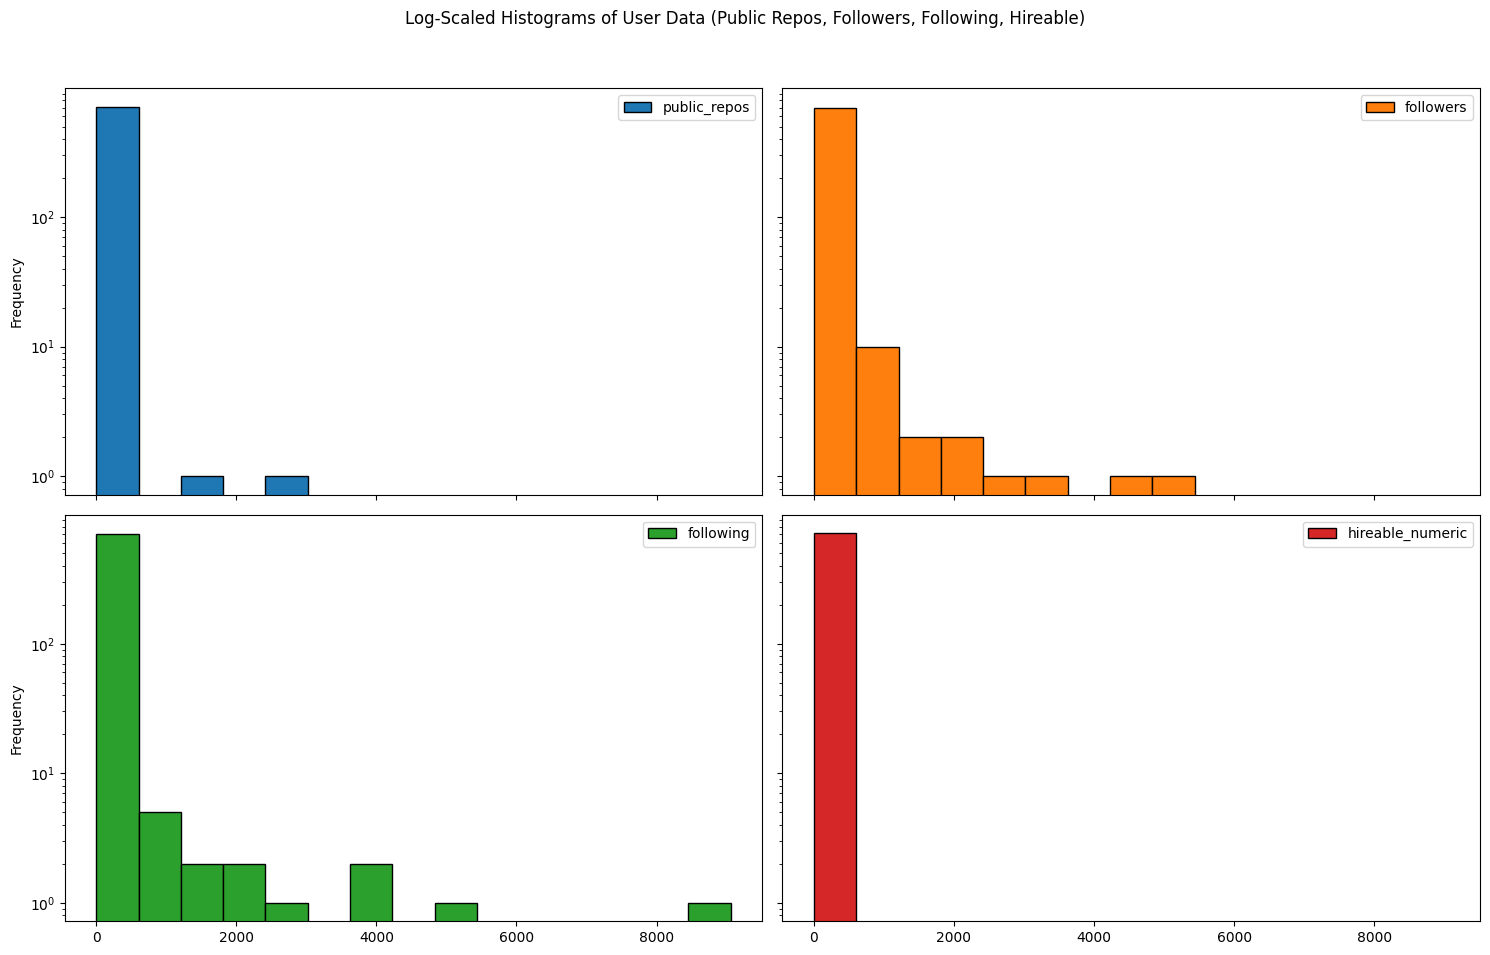

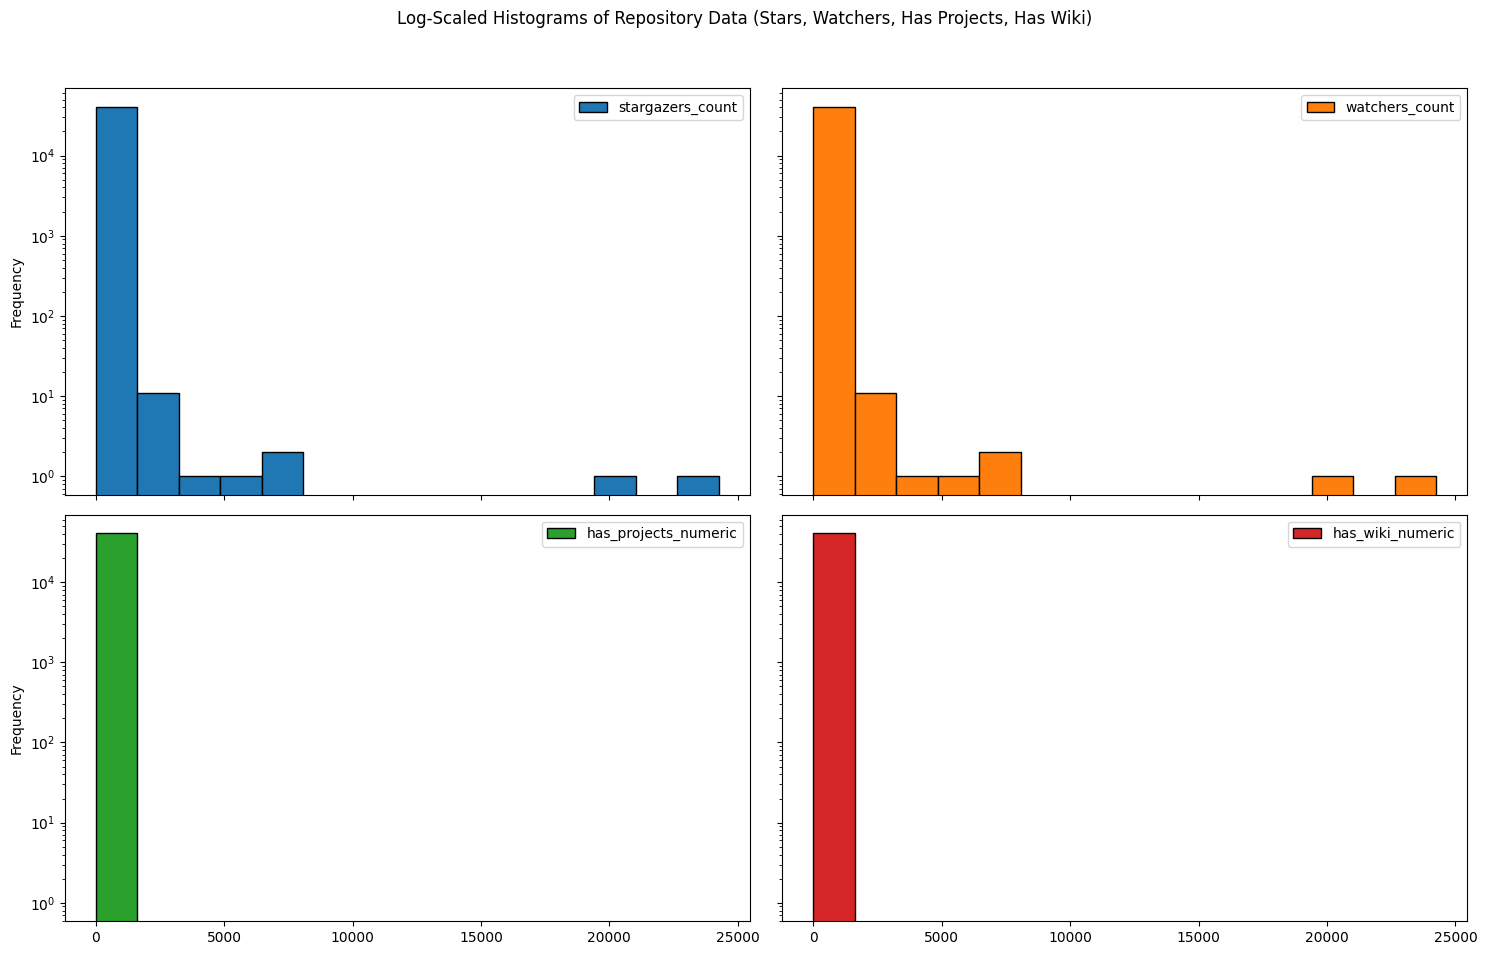

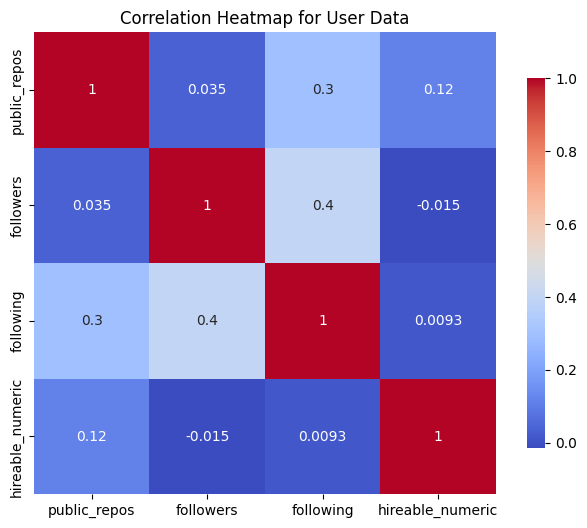

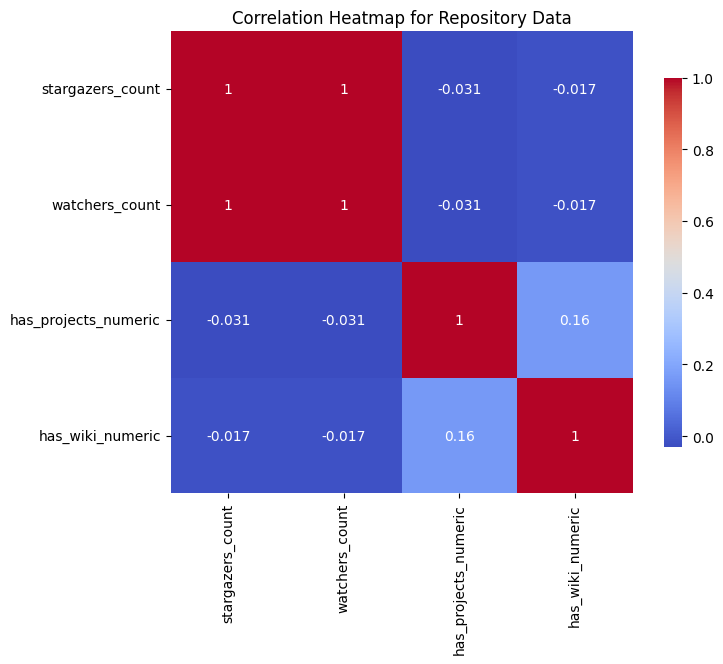

In [121]:
# Plotting log-scaled histograms for numerical columns in `user_df`
numerical_columns_user_df = ['public_repos', 'followers', 'following', 'hireable_numeric']
user_df[numerical_columns_user_df].plot(kind='hist', bins=15, subplots=True, layout=(2, 2),
                                        figsize=(15, 10), edgecolor='black', logy=True, sharey=True)
plt.suptitle("Log-Scaled Histograms of User Data (Public Repos, Followers, Following, Hireable)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

# Plotting log-scaled histograms for numerical columns in `repo_df`
numerical_columns_repo_df = ['stargazers_count', 'watchers_count', 'has_projects_numeric', 'has_wiki_numeric']
repo_df[numerical_columns_repo_df].plot(kind='hist', bins=15, subplots=True, layout=(2, 2),
                                        figsize=(15, 10), edgecolor='black', logy=True, sharey=True)
plt.suptitle("Log-Scaled Histograms of Repository Data (Stars, Watchers, Has Projects, Has Wiki)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation Heatmap for `user_df`
plt.figure(figsize=(8, 6))
sns.heatmap(user_df[numerical_columns_user_df].corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Heatmap for User Data")
plt.show()

# Correlation Heatmap for `repo_df`
plt.figure(figsize=(8, 6))
sns.heatmap(repo_df[numerical_columns_repo_df].corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Heatmap for Repository Data")
plt.show()

C:\Users\umang\AppData\Local\Temp\ipykernel_24496\3022054952.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_repo_count = repo_df['created_at'].dt.to_period('M').value_counts().sort_index()


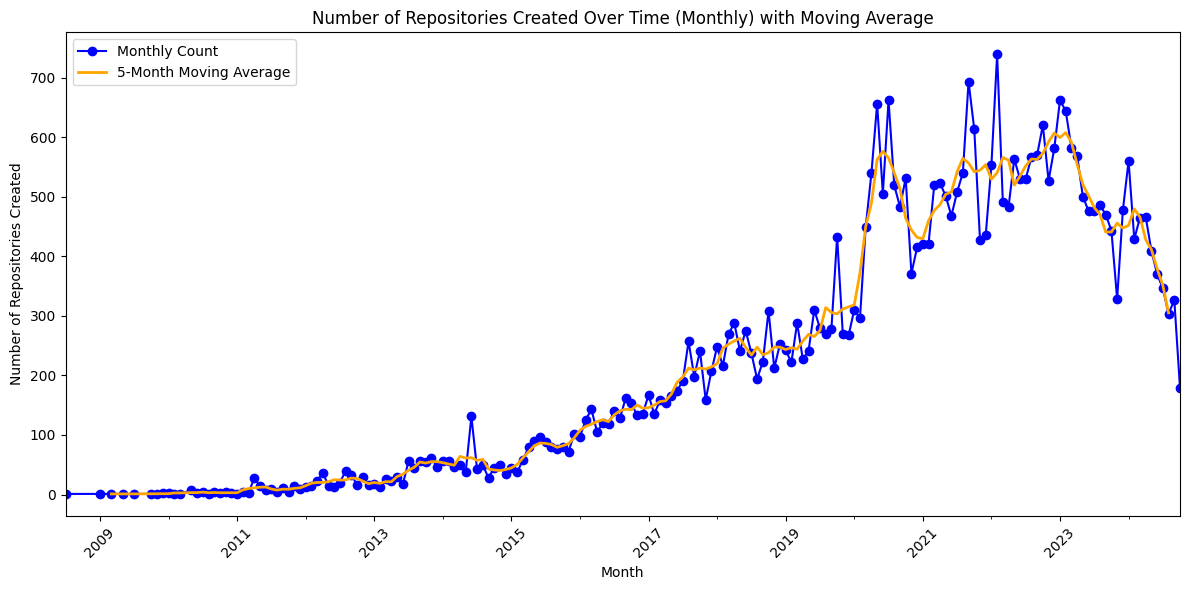

In [129]:
# Ensure 'created_at' is in datetime format if it isn't already
repo_df['created_at'] = pd.to_datetime(repo_df['created_at'])

# Group by month and count the number of repositories created each month
monthly_repo_count = repo_df['created_at'].dt.to_period('M').value_counts().sort_index()

# Calculate a rolling average to smooth the data (3-month moving average)
monthly_repo_count_smooth = monthly_repo_count.rolling(window=5, center=True).mean()

# Plotting the data with a smooth moving average
plt.figure(figsize=(12, 6))
monthly_repo_count.plot(kind='line', marker='o', linestyle='-', color='b', label='Monthly Count')
monthly_repo_count_smooth.plot(kind='line', color='orange', linewidth=2, label='5-Month Moving Average')
plt.title('Number of Repositories Created Over Time (Monthly) with Moving Average')
plt.xlabel('Month')
plt.ylabel('Number of Repositories Created')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\umang\AppData\Local\Temp\ipykernel_24496\1992896700.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_user_count = user_df['created_at'].dt.to_period('M').value_counts().sort_index()


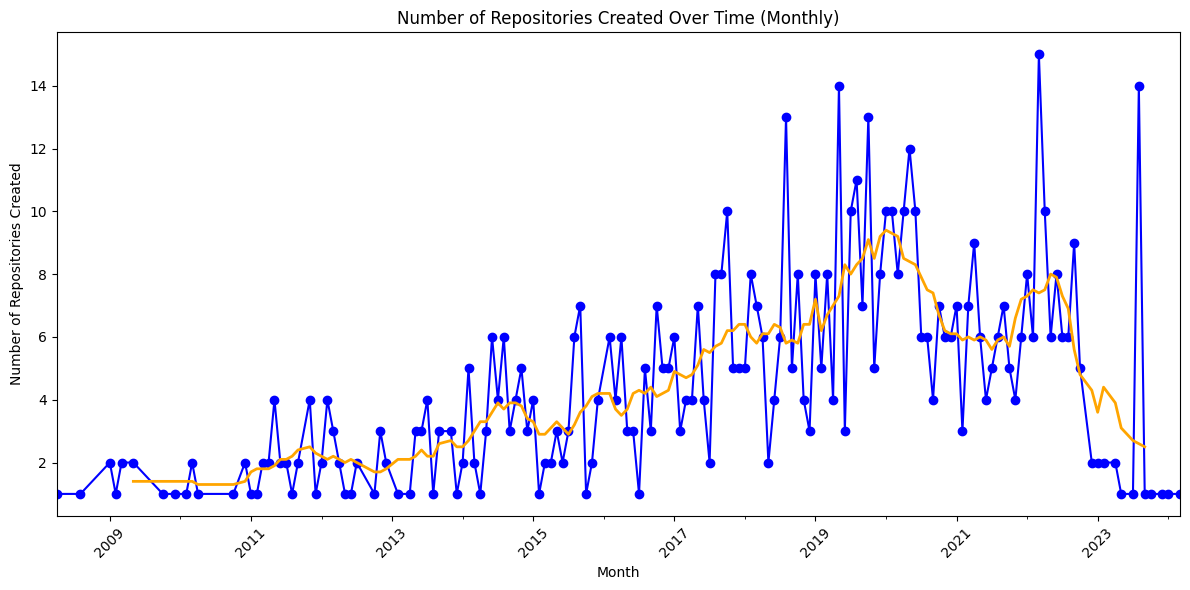

In [131]:
# Convert 'created_at' to datetime if it is not already
user_df['created_at'] = pd.to_datetime(user_df['created_at'])

# Group by month and count the number of repositories created each month
monthly_user_count = user_df['created_at'].dt.to_period('M').value_counts().sort_index()

monthly_user_count_smooth = monthly_user_count.rolling(window=10, center=True).mean()


# Plotting the data
plt.figure(figsize=(12, 6))
monthly_user_count.plot(kind='line', marker='o', linestyle='-', color='b')
monthly_user_count_smooth.plot(kind='line', color='orange', linewidth=2, label='10-Month Moving Average')
plt.title('Number of Repositories Created Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Repositories Created')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\umang\AppData\Local\Temp\ipykernel_24496\3356088368.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_followers = user_df.groupby(user_df['created_at'].dt.to_period('M'))['followers'].sum()


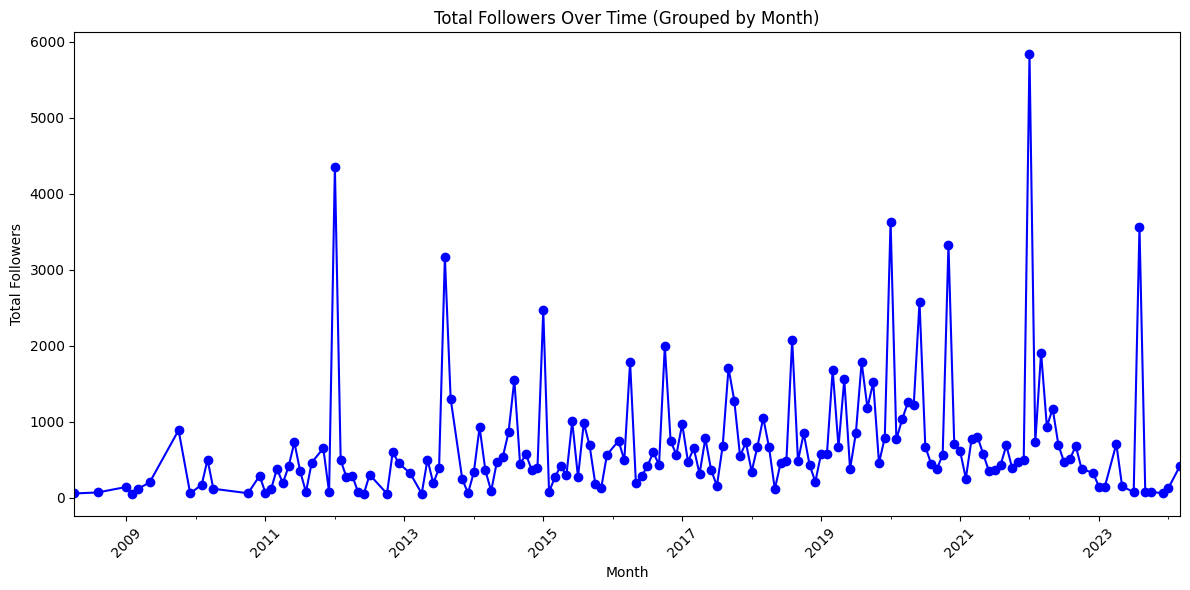

In [132]:

# Ensure 'created_at' is in datetime format if it isn't already
user_df['created_at'] = pd.to_datetime(user_df['created_at'])

# Group by month and sum the number of followers per month
monthly_followers = user_df.groupby(user_df['created_at'].dt.to_period('M'))['followers'].sum()

# Plotting the data
plt.figure(figsize=(12, 6))
monthly_followers.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Total Followers Over Time (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Total Followers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

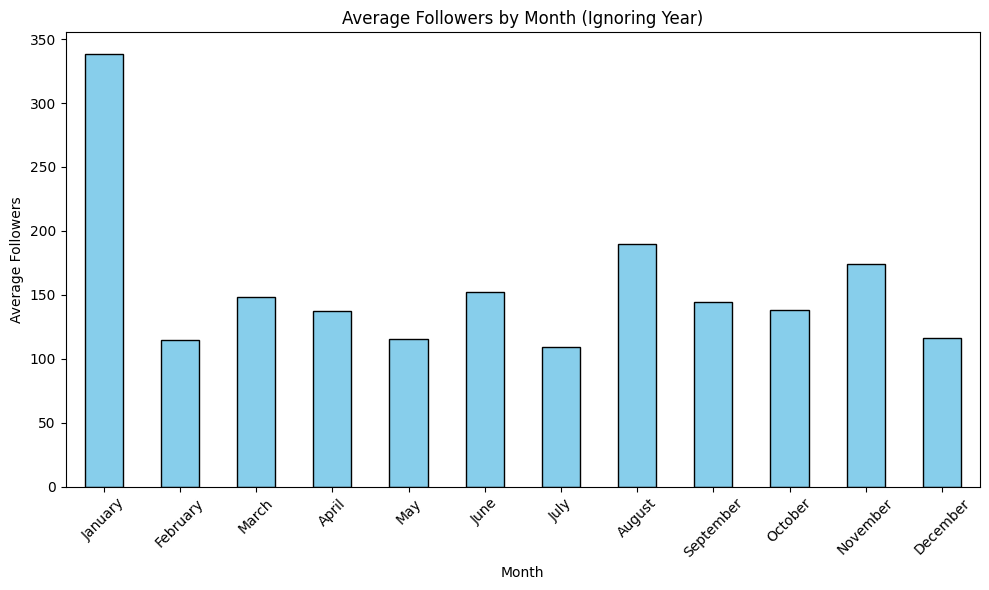

In [133]:
# Ensure 'created_at' is in datetime format if it isn't already
user_df['created_at'] = pd.to_datetime(user_df['created_at'])

# Extract month names from `created_at` for grouping, ignoring years
user_df['month'] = user_df['created_at'].dt.month_name()

# Group by month (ignoring years) and calculate the mean number of followers per month
monthly_followers = user_df.groupby('month')['followers'].mean()

# Sort by calendar order to display January through December
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
monthly_followers = monthly_followers.reindex(month_order)

# Plotting the data
plt.figure(figsize=(10, 6))
monthly_followers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Followers by Month (Ignoring Year)')
plt.xlabel('Month')
plt.ylabel('Average Followers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
january_users = user_df[user_df['created_at'].dt.month == 1]
# Display the result
january_users.head(5)

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,leader_strength,hireable_numeric,month
0,ValentineFernandes,Valentine Fernandes,,"Mumbai, India",,False,HTML | CSS | JS | SQL | MYSQL | JAVA,66,5248,5275,2022-01-29 08:11:37+00:00,0.994693,0,January
1,kovidgoyal,Kovid Goyal,,"Mumbai, India",,False,Principal developer of calibre and kitty,37,4272,0,2012-01-06 05:38:24+00:00,4272.000000,0,January
4,coding-parrot,Gaurav Sen,INTERVIEWREADY,"Mumbai, India",,False,CEO of InterviewReady,11,2410,0,2020-01-03 14:13:35+00:00,2410.000000,0,January
5,gkcs,Gaurav,DIRECTI,Mumbai,gauravsen92@gmail.com,False,A software engineer passionate about AI and Co...,9,2178,0,2015-01-12 09:14:38+00:00,2178.000000,0,January
21,yTakkar,Faiyaz Shaikh,KOGNITOS,Mumbai,,True,\r\nA product builder!,139,547,89,2017-01-05 04:53:56+00:00,6.077778,1,January


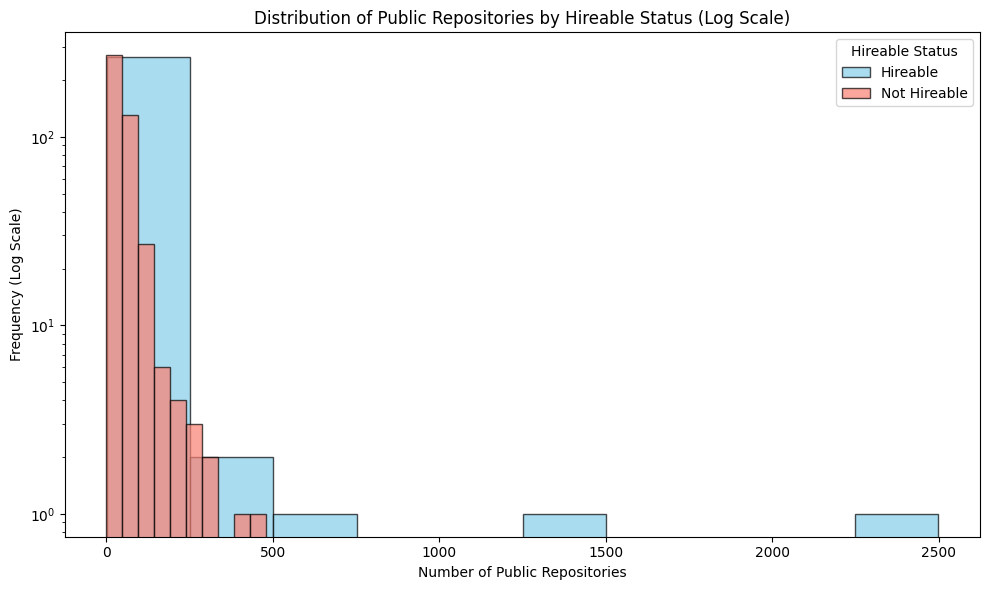

In [139]:
# Plotting a histogram of public repositories grouped by hireable_numeric status with fewer bins and log scale
plt.figure(figsize=(10, 6))
user_df[user_df['hireable_numeric'] == 1]['public_repos'].plot(
    kind='hist', bins=10, alpha=0.7, label='Hireable', color='skyblue', edgecolor='black', log=True
)
user_df[user_df['hireable_numeric'] == 0]['public_repos'].plot(
    kind='hist', bins=10, alpha=0.7, label='Not Hireable', color='salmon', edgecolor='black', log=True
)

plt.title("Distribution of Public Repositories by Hireable Status (Log Scale)")
plt.xlabel("Number of Public Repositories")
plt.ylabel("Frequency (Log Scale)")
plt.legend(title="Hireable Status")
plt.tight_layout()
plt.show()

In [145]:
user_df[user_df['public_repos'] > 500]

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,leader_strength,hireable_numeric,month
90,vinod1988,Vinod Vishwakarma,,Mumbai,vish.vino@gmail.com,True,FullStack Developer,1283,222,4065,2012-07-17 13:25:56+00:00,0.054599,1,July
141,mohd14shoeb,Shoeb Khan,CITIUSTECH HEALTHCARE,Mumbai,mohd14shoeb@gmail.com,True,Senior Software Engineer (iOS App Developer),2499,169,1812,2011-07-04 05:41:25+00:00,0.093216,1,July
684,patilswapnilv,Swapnil V. Patil,DEVTRON-LABS,Mumbai,,True,,559,52,174,2012-06-09 14:03:53+00:00,0.297143,1,June


c:\Users\umang\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6890: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)
c:\Users\umang\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6890: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


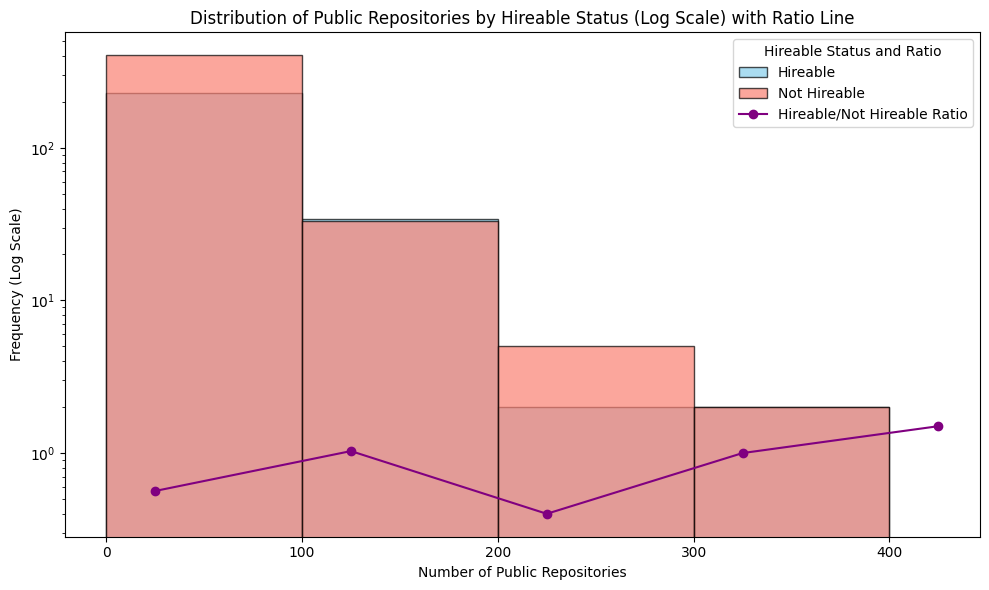

In [155]:
# Define custom bins to ensure all values over 500 are grouped into a single bin
bins = list(range(0, 500, 100)) + [float('inf')]  # Bins from 0 to 450 with 50 increments, then 500+ as one bin

# Calculate histogram data for each hireable status separately
hireable_counts, _ = np.histogram(user_df[user_df['hireable_numeric'] == 1]['public_repos'], bins=bins)
not_hireable_counts, _ = np.histogram(user_df[user_df['hireable_numeric'] == 0]['public_repos'], bins=bins)

# Avoid division by zero by setting zero counts to a small positive number
not_hireable_counts = np.where(not_hireable_counts == 0, 1, not_hireable_counts)

# Calculate the ratio of hireable to not hireable for each bin
ratio_hireable = hireable_counts / not_hireable_counts

# Plotting the histogram of public repositories grouped by hireable_numeric status
plt.figure(figsize=(10, 6))
user_df[user_df['hireable_numeric'] == 1]['public_repos'].plot(
    kind='hist', bins=bins, alpha=0.7, label='Hireable', color='skyblue', edgecolor='black', log=True
)
user_df[user_df['hireable_numeric'] == 0]['public_repos'].plot(
    kind='hist', bins=bins, alpha=0.7, label='Not Hireable', color='salmon', edgecolor='black', log=True
)

# Adding the ratio line on top of the histograms
bin_centers = np.array(bins[:-1]) + 25  # Center points of each bin (assuming bins were set at increments of 50)
plt.plot(bin_centers, ratio_hireable, marker='o', color='purple', label='Hireable/Not Hireable Ratio')

# Adding titles, labels, and legend
plt.title("Distribution of Public Repositories by Hireable Status (Log Scale) with Ratio Line")
plt.xlabel("Number of Public Repositories")
plt.ylabel("Frequency (Log Scale)")
plt.legend(title="Hireable Status and Ratio")
plt.tight_layout()
plt.show()

In [166]:
bbmean_repos_hireable = user_df[user_df['hireable_numeric'] == 1]['public_repos'].mean()
bbmean_repos_not_hireable = user_df[user_df['hireable_numeric'] == 0]['public_repos'].mean()

bbmean_repos_hireable, bbmean_repos_not_hireable

(78.44981412639405, 50.926008968609864)

In [168]:
# Calculate IQR for 'public_repos'
Q1 = user_df['public_repos'].quantile(0.25)
Q3 = user_df['public_repos'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_user_df = user_df[(user_df['public_repos'] >= lower_bound) & (user_df['public_repos'] <= upper_bound)]

# Calculate the mean number of public repositories for hireable and not hireable users, after removing outliers
mean_repos_hireable = filtered_user_df[filtered_user_df['hireable_numeric'] == 1]['public_repos'].mean()
mean_repos_not_hireable = filtered_user_df[filtered_user_df['hireable_numeric'] == 0]['public_repos'].mean()

mean_repos_hireable, mean_repos_not_hireable

(53.21862348178138, 43.018691588785046)

In [169]:
mean_repos_hireable/mean_repos_not_hireable

1.2371046518684787

In [170]:
bbmean_repos_hireable/bbmean_repos_not_hireable

1.5404665654194403

C:\Users\umang\AppData\Local\Temp\ipykernel_24496\3525264574.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_vs_watchers.index, y=day_vs_watchers.values, palette="viridis")


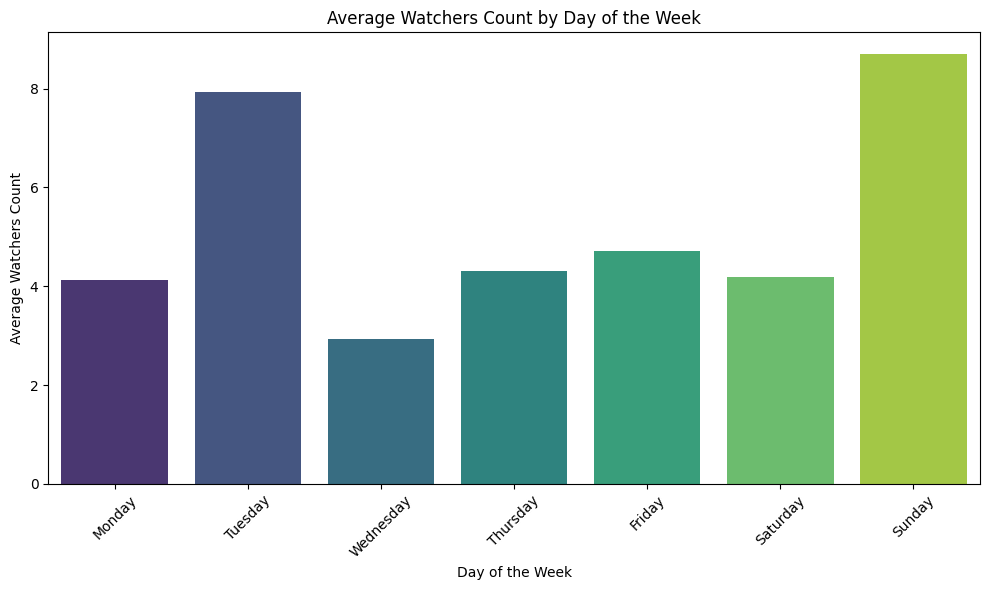

In [179]:
# Map integer values to corresponding day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
repo_df['day_of_week_name'] = repo_df['day_of_week'].map(day_mapping)

# Group by day name and calculate the mean watchers count for each day
day_vs_watchers = repo_df.groupby('day_of_week_name')['watchers_count'].mean()

# Ensure all days are included by reindexing based on the ordered day names
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_vs_watchers = day_vs_watchers.reindex(ordered_days).fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=day_vs_watchers.index, y=day_vs_watchers.values, palette="viridis")
plt.title("Average Watchers Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Watchers Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\umang\AppData\Local\Temp\ipykernel_24496\2353610984.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_repo_df['day_of_week_name'] = filtered_repo_df['day_of_week'].map(day_mapping)
C:\Users\umang\AppData\Local\Temp\ipykernel_24496\2353610984.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_vs_watchers.index, y=day_vs_watchers.values, palette="viridis")


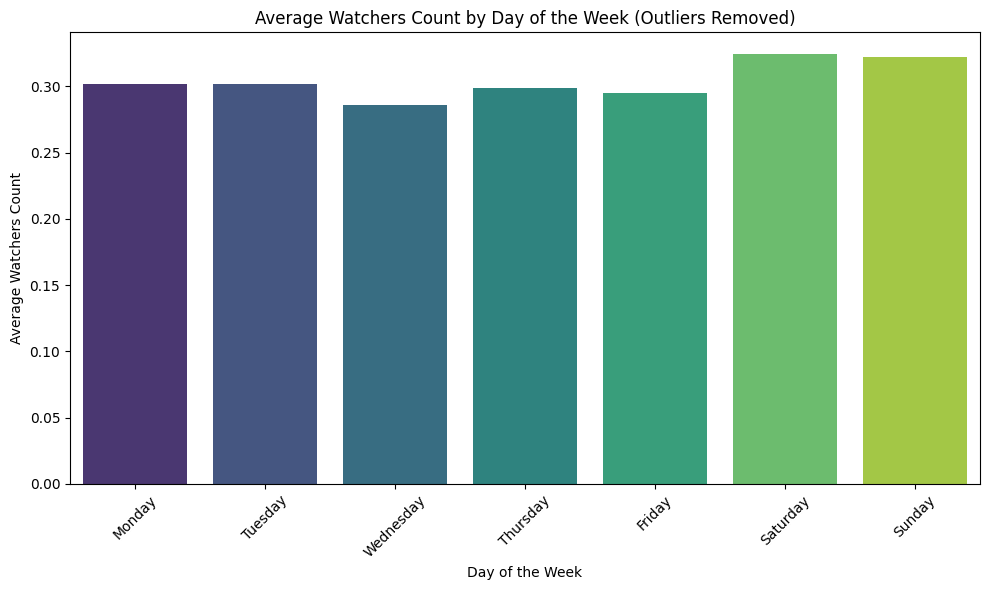

In [180]:
# Step 1: Remove outliers from `watchers_count` using the IQR method
Q1 = repo_df['watchers_count'].quantile(0.25)
Q3 = repo_df['watchers_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where `watchers_count` is outside the IQR range
filtered_repo_df = repo_df[(repo_df['watchers_count'] >= lower_bound) & (repo_df['watchers_count'] <= upper_bound)]

# Step 2: Map integer values of `day_of_week` to corresponding day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
filtered_repo_df['day_of_week_name'] = filtered_repo_df['day_of_week'].map(day_mapping)

# Step 3: Group by day name and calculate the mean watchers count for each day
day_vs_watchers = filtered_repo_df.groupby('day_of_week_name')['watchers_count'].mean()

# Ensure all days are included by reindexing based on the ordered day names
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_vs_watchers = day_vs_watchers.reindex(ordered_days).fillna(0)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=day_vs_watchers.index, y=day_vs_watchers.values, palette="viridis")
plt.title("Average Watchers Count by Day of the Week (Outliers Removed)")
plt.xlabel("Day of the Week")
plt.ylabel("Average Watchers Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
repo_df.columns

Index(['login', 'full_name', 'created_at', 'stargazers_count',
       'watchers_count', 'language', 'has_projects', 'has_wiki',
       'license_name'],
      dtype='object')

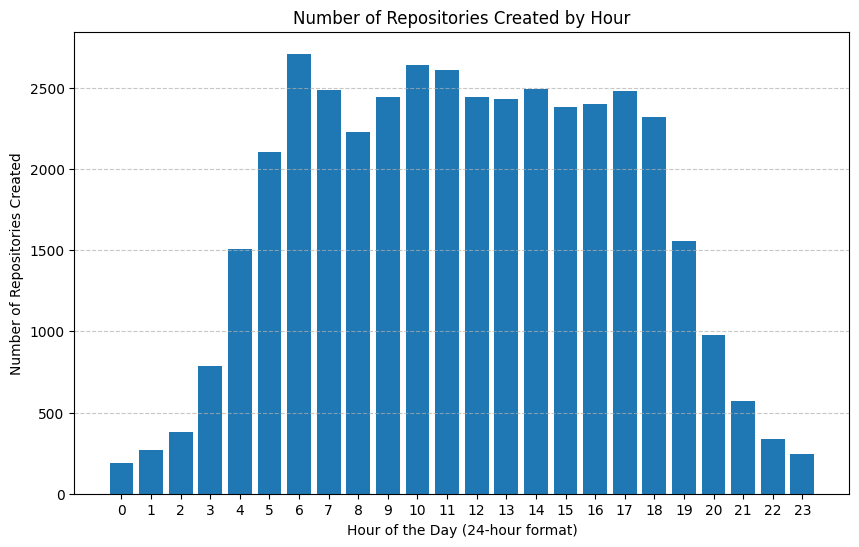

In [13]:
# Ensure 'created_at' is in datetime format
repo_df['created_at'] = pd.to_datetime(repo_df['created_at'])

# Extract the hour from 'created_at'
repo_df['hour'] = repo_df['created_at'].dt.hour

# Count the number of repositories created in each hour
hourly_counts = repo_df['hour'].value_counts().sort_index()

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, width=0.8)
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Repositories Created')
plt.title('Number of Repositories Created by Hour')
plt.xticks(range(24))  # Show every hour from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

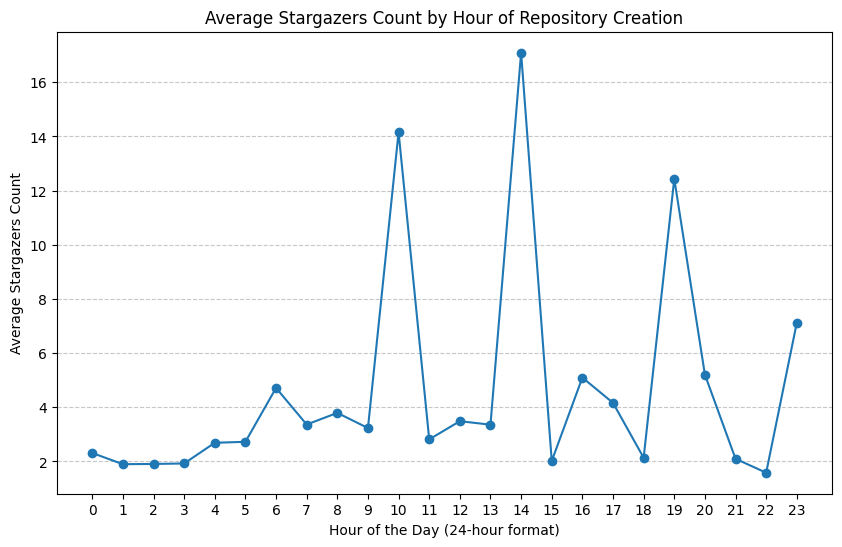

In [15]:
# Ensure 'created_at' is in datetime format
repo_df['created_at'] = pd.to_datetime(repo_df['created_at'])

# Extract the hour from 'created_at'
repo_df['hour'] = repo_df['created_at'].dt.hour

# Group by hour and calculate the average stargazers count
hourly_avg_stars = repo_df.groupby('hour')['stargazers_count'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_stars.index, hourly_avg_stars.values, marker='o')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Average Stargazers Count')
plt.title('Average Stargazers Count by Hour of Repository Creation')
plt.xticks(range(24))  # Show each hour from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

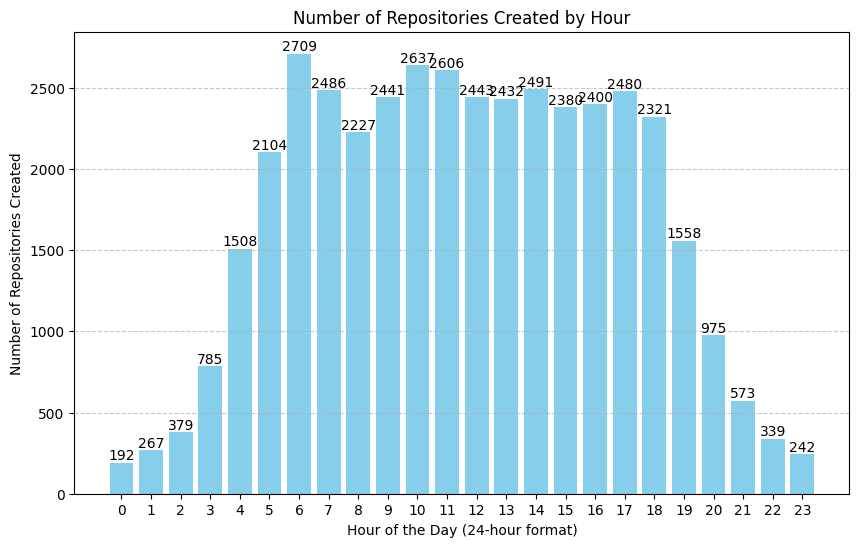

In [16]:
# Ensure 'created_at' is in datetime format
repo_df['created_at'] = pd.to_datetime(repo_df['created_at'])

# Extract the hour from 'created_at'
repo_df['hour'] = repo_df['created_at'].dt.hour

# Count the number of repositories created in each hour
hourly_counts = repo_df['hour'].value_counts().sort_index()

# Plot a histogram with counts displayed on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_counts.index, hourly_counts.values, width=0.8, color='skyblue')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Repositories Created')
plt.title('Number of Repositories Created by Hour')
plt.xticks(range(24))  # Show every hour from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [30]:
hourly_counts[6:19].sum()/hourly_counts[:].sum()

0.7822574740695546

In [31]:
hourly_counts[:].sum()

40975